In [67]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
data=pd.read_csv('data.csv',names=column_names)

In [3]:
data

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...,...
4995,4995,2007,17,6,3,90,125,13539
4996,4996,2016,7,10,0,85,129,14757
4997,4997,2017,6,10,5,90,125,14102
4998,4998,2010,37,3,5,81,128,14313


In [10]:
data.corr()

,serial,date,age,distance,stores,latitude,longitude,price
serial,1.000000,0.009788,0.028695,0.001985,-0.008224,-0.013213,0.002564,0.024383
date,0.009788,1.000000,-0.015108,0.023578,-0.007395,0.001455,-0.001765,0.036171
age,0.028695,-0.015108,1.000000,-0.010661,0.005447,0.007539,0.022218,0.616318
distance,0.001985,0.023578,-0.010661,1.000000,0.000270,-0.000854,-0.021364,0.651004
stores,-0.008224,-0.007395,0.005447,0.000270,1.000000,0.005351,0.005737,0.158329
latitude,-0.013213,0.001455,0.007539,-0.000854,0.005351,1.000000,-0.009402,0.010986
longitude,0.002564,-0.001765,0.022218,-0.021364,0.005737,-0.009402,1.000000,0.020915
price,0.024383,0.036171,0.616318,0.651004,0.158329,0.010986,0.020915,1.000000


In [73]:
x=data.drop(['price','serial','date','latitude','longitude'],axis=1)
y=data[['price']]

In [75]:
minmax=MinMaxScaler()
minmax.fit(x)
x_transform=minmax.transform(x)
x_transform

array([[0.55263158, 0.9       , 0.6       ],
       [0.10526316, 0.2       , 0.3       ],
       [0.47368421, 0.3       , 0.7       ],
       ...,
       [0.15789474, 1.        , 0.5       ],
       [0.97368421, 0.3       , 0.5       ],
       [0.23684211, 0.1       , 0.9       ]])

In [82]:
X_train, X_test, y_train, y_test=train_test_split(x.values,y.values,test_size=20,shuffle=True,random_state=42)

In [63]:
def create_checkpoint_callback(model_name):
  return tf.keras.callbacks.ModelCheckpoint(filepath=f"{model_name}/checkpoint.ckpt",
                                                          #  monitor="val_accuracy",
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           save_freq="epoch")
es_cb = EarlyStopping(monitor='val_loss', patience=10)

In [83]:
# Create a model
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
  layers.Dense(100,activation='relu'),
  layers.Dense(10,activation='relu'),
  layers.Dense(1)
], name="model_1_dense")
# Compile the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
# Fit the model
model_1_history = model_1.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,callbacks=[es_cb,create_checkpoint_callback(model_1.name)])

Epoch 1/100
156/156 [==============================] - 0s 1ms/step - loss: 13869.8584 - mae: 13869.8584 - val_loss: 13961.1533 - val_mae: 13961.1533
Epoch 2/100
156/156 [==============================] - 0s 1ms/step - loss: 13271.8242 - mae: 13271.8242 - val_loss: 12516.2705 - val_mae: 12516.2705
Epoch 3/100
156/156 [==============================] - 0s 964us/step - loss: 10723.7080 - mae: 10723.7080 - val_loss: 8117.0830 - val_mae: 8117.0830
Epoch 4/100
156/156 [==============================] - 0s 993us/step - loss: 5447.1543 - mae: 5447.1543 - val_loss: 3364.9062 - val_mae: 3364.9062
Epoch 5/100
156/156 [==============================] - 0s 1ms/step - loss: 3670.9578 - mae: 3670.9578 - val_loss: 3309.8882 - val_mae: 3309.8882
Epoch 6/100
156/156 [==============================] - 0s 1ms/step - loss: 3524.0627 - mae: 3524.0627 - val_loss: 3219.6191 - val_mae: 3219.6191
Epoch 7/100
156/156 [==============================] - 0s 1ms/step - loss: 3383.8037 - mae: 3383.8037 - val_loss: 31

156/156 [==============================] - 0s 982us/step - loss: 378.0293 - mae: 378.0293 - val_loss: 498.2608 - val_mae: 498.2608
Epoch 58/100
156/156 [==============================] - 0s 1ms/step - loss: 373.9232 - mae: 373.9232 - val_loss: 484.3054 - val_mae: 484.3054
Epoch 59/100
156/156 [==============================] - 0s 1ms/step - loss: 369.0487 - mae: 369.0487 - val_loss: 463.3960 - val_mae: 463.3960
Epoch 60/100
156/156 [==============================] - 0s 1ms/step - loss: 365.0870 - mae: 365.0870 - val_loss: 459.1861 - val_mae: 459.1861
Epoch 61/100
156/156 [==============================] - 0s 1ms/step - loss: 365.7127 - mae: 365.7127 - val_loss: 440.5275 - val_mae: 440.5275
Epoch 62/100
156/156 [==============================] - 0s 1ms/step - loss: 360.9244 - mae: 360.9244 - val_loss: 434.2123 - val_mae: 434.2123
Epoch 63/100
156/156 [==============================] - 0s 802us/step - loss: 358.4506 - mae: 358.4506 - val_loss: 442.2449 - val_mae: 442.2449
Epoch 64/100
15

In [52]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 100)               400       
                                                                 
 dense_65 (Dense)            (None, 10)                1010      
                                                                 
 dense_66 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,421
Trainable params: 1,421
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Load best model and evaluate on test data
model_1.load_weights("model_1_dense/checkpoint.ckpt")
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 398.7541 - mae: 398.7541


[398.75408935546875, 398.75408935546875]

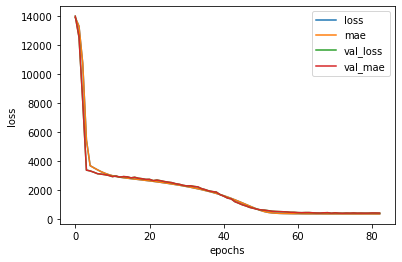

In [85]:
pd.DataFrame(model_1_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [86]:
model_1.save("model_1_dense/Model_1.h5")
model_1.save("model_1_dense/Model_1.pb")

INFO:tensorflow:Assets written to: model_1_dense/Model_1.pb\assets


In [87]:
model_1_preds = model_1.predict(X_test)

In [88]:
model_1_preds

array([[14272.96 ],
       [14923.352],
       [12958.813],
       [13663.122],
       [12648.271],
       [13067.986],
       [14774.238],
       [14468.043],
       [15456.562],
       [13270.586],
       [15899.383],
       [13302.846],
       [16015.926],
       [14298.297],
       [13800.334],
       [14418.587],
       [13421.948],
       [14686.986],
       [13136.734],
       [13289.748]], dtype=float32)

In [95]:
tf.metrics.mean_absolute_error(y_test.squeeze(), model_1_preds.squeeze()).numpy()

398.7542